In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap

#Below hides the 'unparsable' SMILES error since it was annoying
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

pd.set_option("display.max_rows", None, "display.max_columns", None)

DatasetDF = pd.read_csv('C:/Users/trifo/Argonne SULI Project/src/Datasets/PolymerDatabase_Filtered.csv')
PolymerBySmilesDF = DatasetDF[['Common Names (Polymer)', 'SMILES (Monomer)', 'Polymer Class']].copy()


PolymerBySmilesDF['SMILES (Monomer)'] = PolymerBySmilesDF['SMILES (Monomer)'].replace(' ', '')  #Removed any spaces in SMILES format
PolymerBySmilesDF['SMILES (Monomer)'] = PolymerBySmilesDF['SMILES (Monomer)'].replace(u'\xa0', np.nan) #Remove weird unicode 
PolymerBySmilesDF.dropna(0, inplace=True) #Removed polymers with missing (NaN) SMILES
PolymerBySmilesDF.reset_index(drop=True, inplace=True)


MolObjectList = []
for idx, row in PolymerBySmilesDF.iterrows(): #Smiles to Mol Object
    Mol = Chem.MolFromSmiles(row['SMILES (Monomer)'])
    MolObjectList.append(Mol)
PolymerBySmilesDF['MolObj'] = MolObjectList


PolymerBySmilesDF.dropna(0, inplace=True) #Removed unparsable SMILES and copolymers (leaveing only homopolymers)
PolymerBySmilesDF.reset_index(drop=True, inplace=True)


display(PolymerBySmilesDF)


C:\Users\trifo\AppData\Local\Temp/ipykernel_11208/292649291.py:25: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  PolymerBySmilesDF.dropna(0, inplace=True) #Removed polymers with missing (NaN) SMILES
C:\Users\trifo\AppData\Local\Temp/ipykernel_11208/292649291.py:36: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  PolymerBySmilesDF.dropna(0, inplace=True) #Removed unparsable SMILES and copolymers (leaveing only homopolymers)


,Common Names (Polymer),SMILES (Monomer),Polymer Class,MolObj
0,Poly(acrylamide),OC(=N)C=C,Polyacrylamide,<rdkit.Chem.rdchem.Mol object at 0x0000017E21F...
1,Poly(N-isopropyl acrylamide),C=CC(=O)NC(C)C,Polyacrylamide,<rdkit.Chem.rdchem.Mol object at 0x0000017E246...
2,Poly(N-octyl acrylamide),CCCCCCCCNC(=O)C=C,Polyacrylamide,<rdkit.Chem.rdchem.Mol object at 0x0000017E21F...
3,"['Poly(N-tert-butyl acrylamide)', ' Poly[N-(2-...",C=CC(=O)NC(C)(C)C,Polyacrylamide,<rdkit.Chem.rdchem.Mol object at 0x0000017E21F...
4,Poly(N-phenylacrylamide),C=CC(=O)Nc1ccccc1,Polyacrylamide,<rdkit.Chem.rdchem.Mol object at 0x0000017E21F...
5,Poly(N-sec-butylacrylamide),C=CC(=O)NC(C)CC,Polyacrylamide,<rdkit.Chem.rdchem.Mol object at 0x0000017E229...
6,"['Poly(acrylic acid)', ' Acrysol', ' Acumer']",OC(=O)C=C,Polyacrylate,<rdkit.Chem.rdchem.Mol object at 0x0000017E229...
7,Poly(benzyl acrylate),C=CC(=O)OCc1ccccc1,Polyacrylates,<rdkit.Chem.rdchem.Mol object at 0x0000017E229...
8,Poly(butyl acrylate),CCCCOC(=O)C=C,Polyacrylates,<rdkit.Chem.rdchem.Mol object at 0x0000017E229...
9,Poly(4-chlorophenyl acrylate),C=CC(=O)Oc1ccc(cc1)Cl,Polyacrylate,<rdkit.Chem.rdchem.Mol object at 0x0000017E229...


In [46]:
for idx, row in PolymerBySmilesDF.iterrows(): #adding s at the end of polymer classes that don't have it. This is to recognize polyacrylamide and polyacrylamides as the same class or e.g.
                                  #polyether and polyethers as the same polymer class
    if row['Polymer Class'][-1] != 's':
        PolymerBySmilesDF.iloc[idx, 2] = PolymerBySmilesDF.iloc[idx, 2] + 's'  

In [47]:
MorganFingerprints = [AllChem.GetMorganFingerprintAsBitVect(x, radius=4, nBits=2048) for x in PolymerBySmilesDF['MolObj'].tolist()] #Mol to Morgan Fingerprint
PolymerBySmilesDF['Fingerprints (Morgan)'] = MorganFingerprints

TanimotoMatrix = []
for fingerprint in MorganFingerprints: #Creating Tanimoto Similarity Matrix
    val = []
    for idx in range(len(MorganFingerprints)):
        val.append(DataStructs.TanimotoSimilarity(fingerprint, MorganFingerprints[idx]))
    TanimotoMatrix.append(val)
TanimotoArray = np.asarray(TanimotoMatrix)

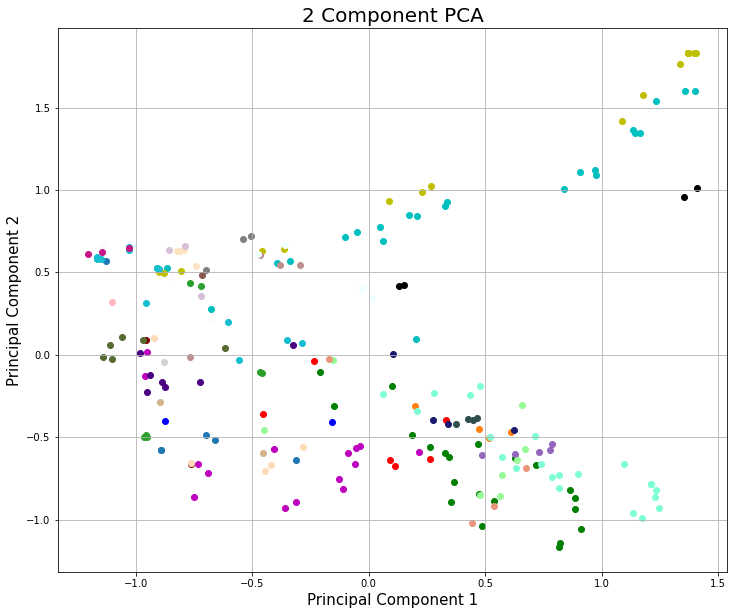

In [48]:
PCAObj1 = PCA(n_components=2) #PCA stuff
Components1 = PCAObj1.fit_transform(TanimotoArray)
PCAdf = pd.DataFrame(data = Components1, columns=['PCA Component 1', 'PCA Component 2'])
PCAdf['Polymer Class'] = PolymerBySmilesDF['Polymer Class']  


PolyClassList = []
for polyclass in PolymerBySmilesDF['Polymer Class'].to_list():
    if polyclass not in PolyClassList:
        PolyClassList.append(polyclass)


ColorList = ['r', 'g', 'b', 'c','m', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green','tab:purple', 'tab:brown', 'tab:gray', 'tab:cyan', 
            'rosybrown', 'maroon', 'bisque', 'tan', 'darkolivegreen', 'aquamarine', 'azure','darkslategray', 'midnightblue', 'indigo', 
            'mediumvioletred', 'lightpink', 'thistle', 'snow', 'lightgray', 'palegreen', 'darksalmon', 'peachpuff']


fig=plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
ax.grid()


for classification, color in zip(PolyClassList, ColorList):  #Plotting points and classifying each polymer class with a different color
    index = PCAdf['Polymer Class'] == classification
    ax.scatter(x = PCAdf.loc[index, 'PCA Component 1'], y = PCAdf.loc[index, 'PCA Component 2'], c = color)

c:\Users\trifo\anaconda3\envs\my-rdkit-env\lib\site-packages\umap\umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


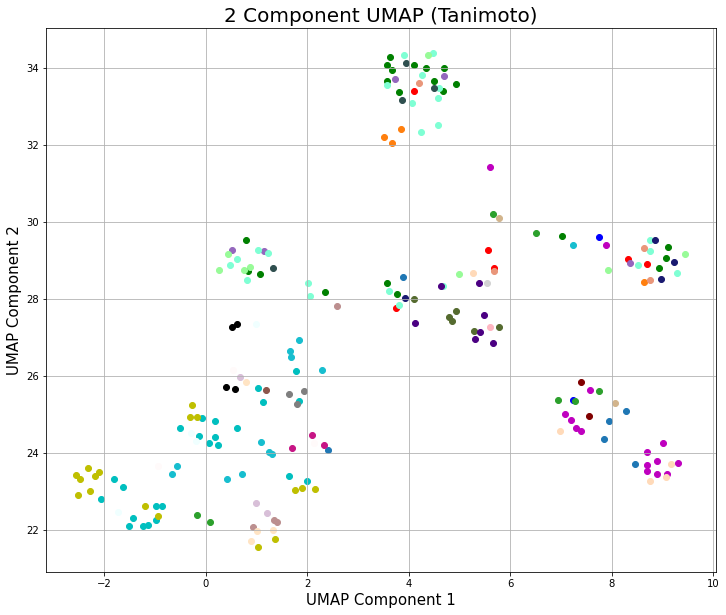

In [49]:
UMAPTanimotoModel = umap.UMAP(metric = 'jaccard', n_neighbors = 50, n_components = 2, min_dist = 0.5)
#Need to tune hyperparameters better
UmapComponents = UMAPTanimotoModel.fit_transform(TanimotoArray)
UMAPdfTanimoto = pd.DataFrame(data = UmapComponents, columns=['UMAP Component 1', 'UMAP Component 2'])
UMAPdfTanimoto['Polymer Class'] = PolymerBySmilesDF['Polymer Class'] 
fig=plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('UMAP Component 1', fontsize = 15)
ax.set_ylabel('UMAP Component 2', fontsize = 15)
ax.set_title('2 Component UMAP (Tanimoto)', fontsize = 20)
ax.grid()
for classification, color in zip(PolyClassList, ColorList):  #Plotting points and classifying each polymer class with a different color
    index = UMAPdfTanimoto['Polymer Class'] == classification
    ax.scatter(x = UMAPdfTanimoto.loc[index, 'UMAP Component 1'], y = UMAPdfTanimoto.loc[index, 'UMAP Component 2'], c = color)

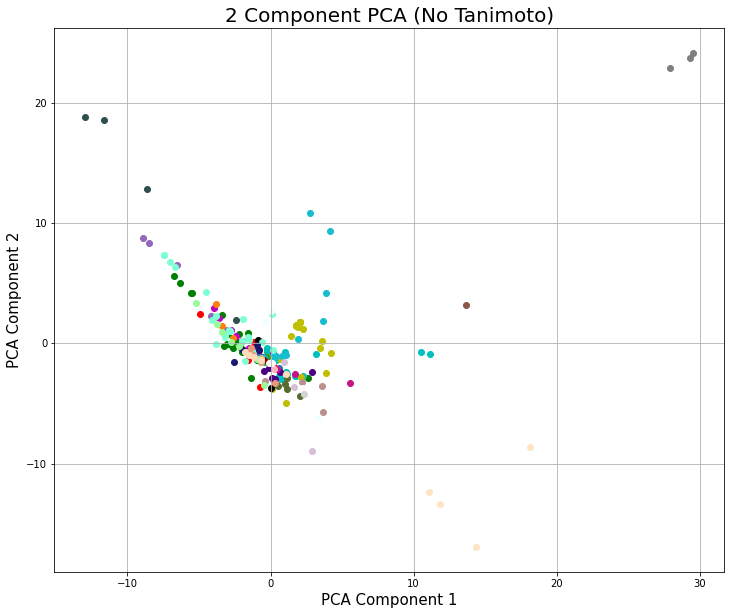

In [50]:
#PCA and t-SNE NO TANIMOTO
MorganFingerprints = np.asarray(MorganFingerprints)
MorganFingerprintsScaler = StandardScaler().fit(MorganFingerprints)
PCAObj2 = PCA(n_components = 2)
Components2 = PCAObj2.fit_transform(MorganFingerprintsScaler.transform(MorganFingerprints))
PCAdfNoTanimoto = pd.DataFrame(data = Components2, columns=['PCA Component 1', 'PCA Component 2'])
PCAdfNoTanimoto['Polymer Class'] = PolymerBySmilesDF['Polymer Class']
fig=plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PCA Component 1', fontsize = 15)
ax.set_ylabel('PCA Component 2', fontsize = 15)
ax.set_title('2 Component PCA (No Tanimoto)', fontsize = 20)
ax.grid()
for classification, color in zip(PolyClassList, ColorList):  #Plotting points and classifying each polymer class with a different color
    index = UMAPdfTanimoto['Polymer Class'] == classification
    ax.scatter(x = PCAdfNoTanimoto.loc[index, 'PCA Component 1'], y = PCAdfNoTanimoto.loc[index, 'PCA Component 2'], c = color)


c:\Users\trifo\anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\trifo\anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


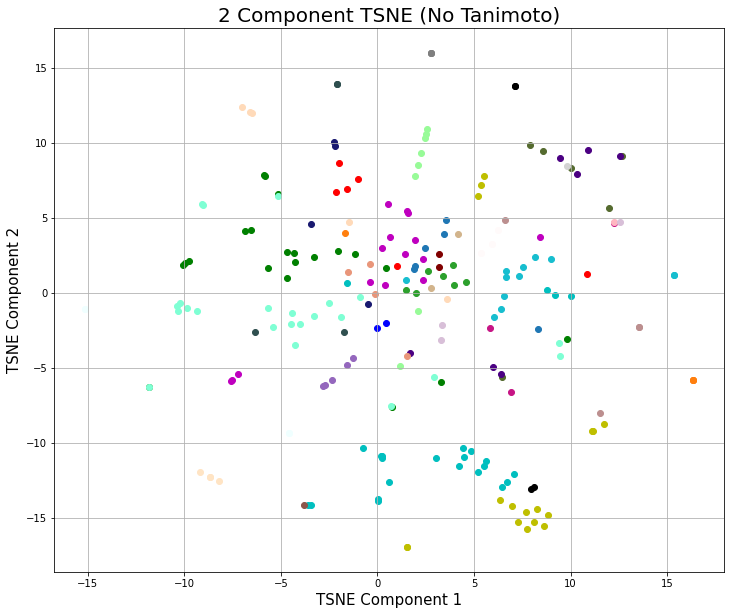

In [51]:
TSNEObj = TSNE(n_components = 2)
TSNEComponents = TSNEObj.fit_transform(PCA(50).fit_transform(MorganFingerprintsScaler.transform(MorganFingerprints)))
TSNEdfNoTanimoto = pd.DataFrame(data = TSNEComponents, columns=['TSNE Component 1', 'TSNE Component 2'])
TSNEdfNoTanimoto['Polymer Class'] = PolymerBySmilesDF['Polymer Class']
fig=plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('TSNE Component 1', fontsize = 15)
ax.set_ylabel('TSNE Component 2', fontsize = 15)
ax.set_title('2 Component TSNE (No Tanimoto)', fontsize = 20)
ax.grid()
for classification, color in zip(PolyClassList, ColorList):  #Plotting points and classifying each polymer class with a different color
    index = TSNEdfNoTanimoto['Polymer Class'] == classification
    ax.scatter(x = TSNEdfNoTanimoto.loc[index, 'TSNE Component 1'], y = TSNEdfNoTanimoto.loc[index, 'TSNE Component 2'], c = color)